#Maize Plant Leaf **Disease** Detection using Convolution-Neural-Network **(CNN)**


**Extablishing connection between google drive and colab workspace**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Projects/data"

fianl1.PNG  Maize_Plant_Disease_Prediction.ipynb  Model1
fianl.PNG   Model				  plant


In [ ]:
!ls "/content/drive/MyDrive/Projects/data/plant"

Blight	Common_Rust  Healthy


**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam,SGD
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras.layers import Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

*checking the verion of tensor flow libraires*

In [ ]:
print(tf. __version__)

2.12.0


In [ ]:
path, dirs, files = next(os.walk('/content/drive/MyDrive/Projects/data/plant/Blight'))
file_count = len(files)
print('Number of images for Blight: ', file_count)

path, dirs, files = next(os.walk('/content/drive/MyDrive/Projects/data/plant/Common_Rust'))
file_count = len(files)
print('Number of images for Common Rust: ', file_count)

path, dirs, files = next(os.walk('/content/drive/MyDrive/Projects/data/plant/Healthy'))
file_count = len(files)
print('Number of images for Healthy leaf: ', file_count)

Number of images for Blight:  1155
Number of images for Common Rust:  1303
Number of images for Healthy leaf:  1162


**Visualising and resizing the Images**

In [ ]:
import PIL.Image as Image

def resize_images(path):
  for img_file in os.listdir(path):
    img = Image.open(os.path.join(path, img_file))
    img = img.resize((256, 256))
    img.save(os.path.join(path, img_file))

if __name__ == "__main__":
  directories = ["/content/drive/MyDrive/Projects/data/plant/Blight","/content/drive/MyDrive/Projects/data/plant/Common_Rust","/content/drive/MyDrive/Projects/data/plant/Healthy"]
  for directory in directories:
    resize_images(directory)


# **Blight**

In [ ]:
plt.figure(figsize=(12,12))
path="/content/drive/MyDrive/Projects/data/plant/Blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

# **Common Rust**

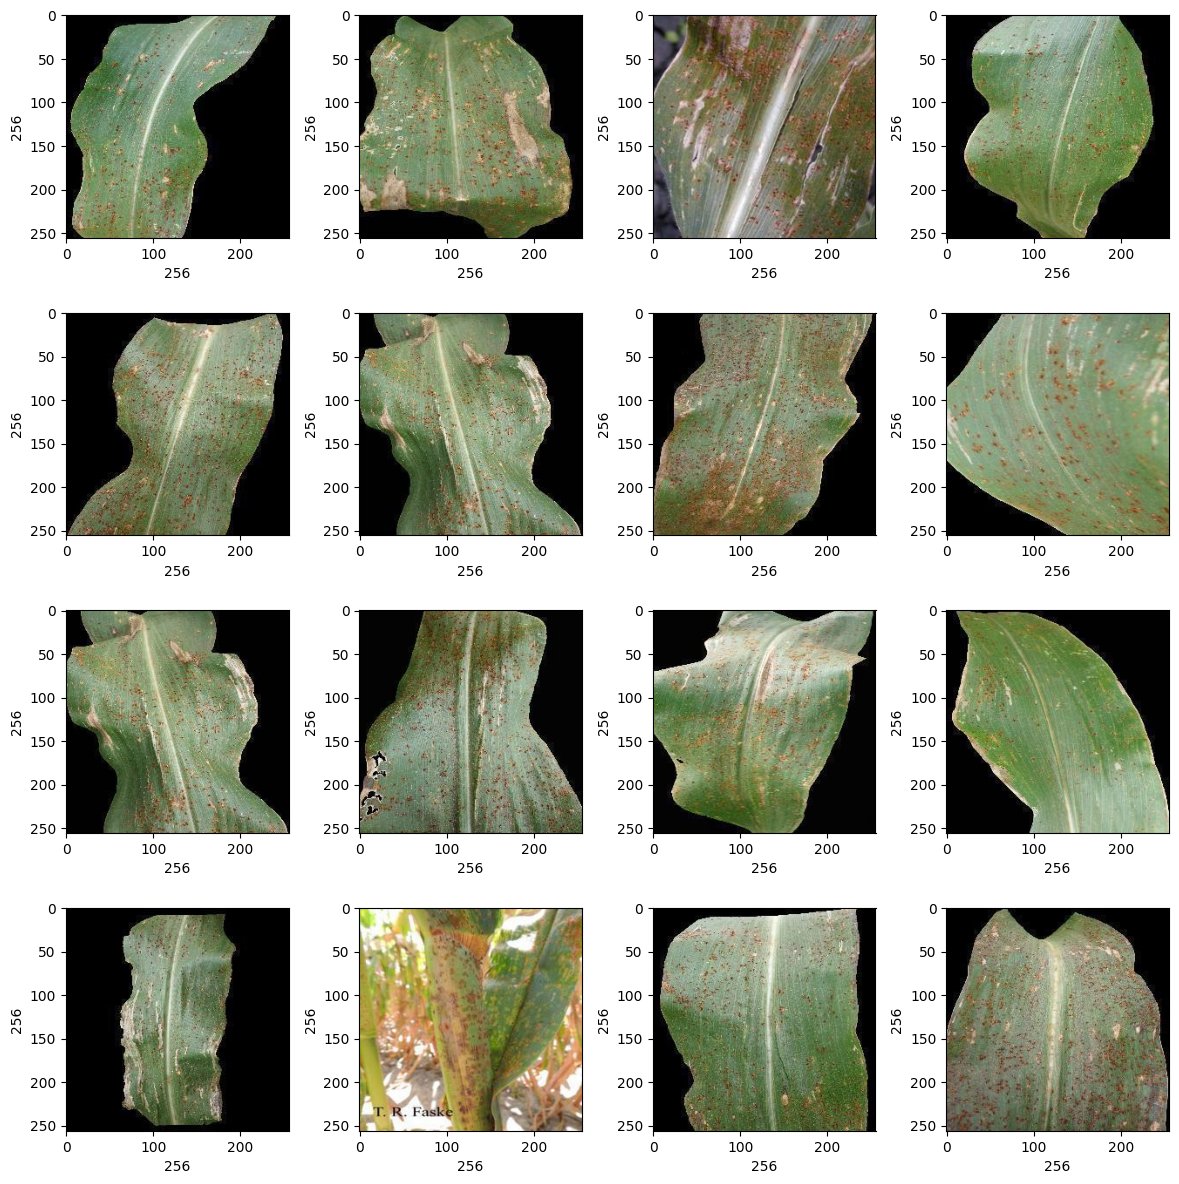

In [ ]:
plt.figure(figsize=(12,12))
path="/content/drive/MyDrive/Projects/data/plant/Common_Rust"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

# **Healthy Leaf**

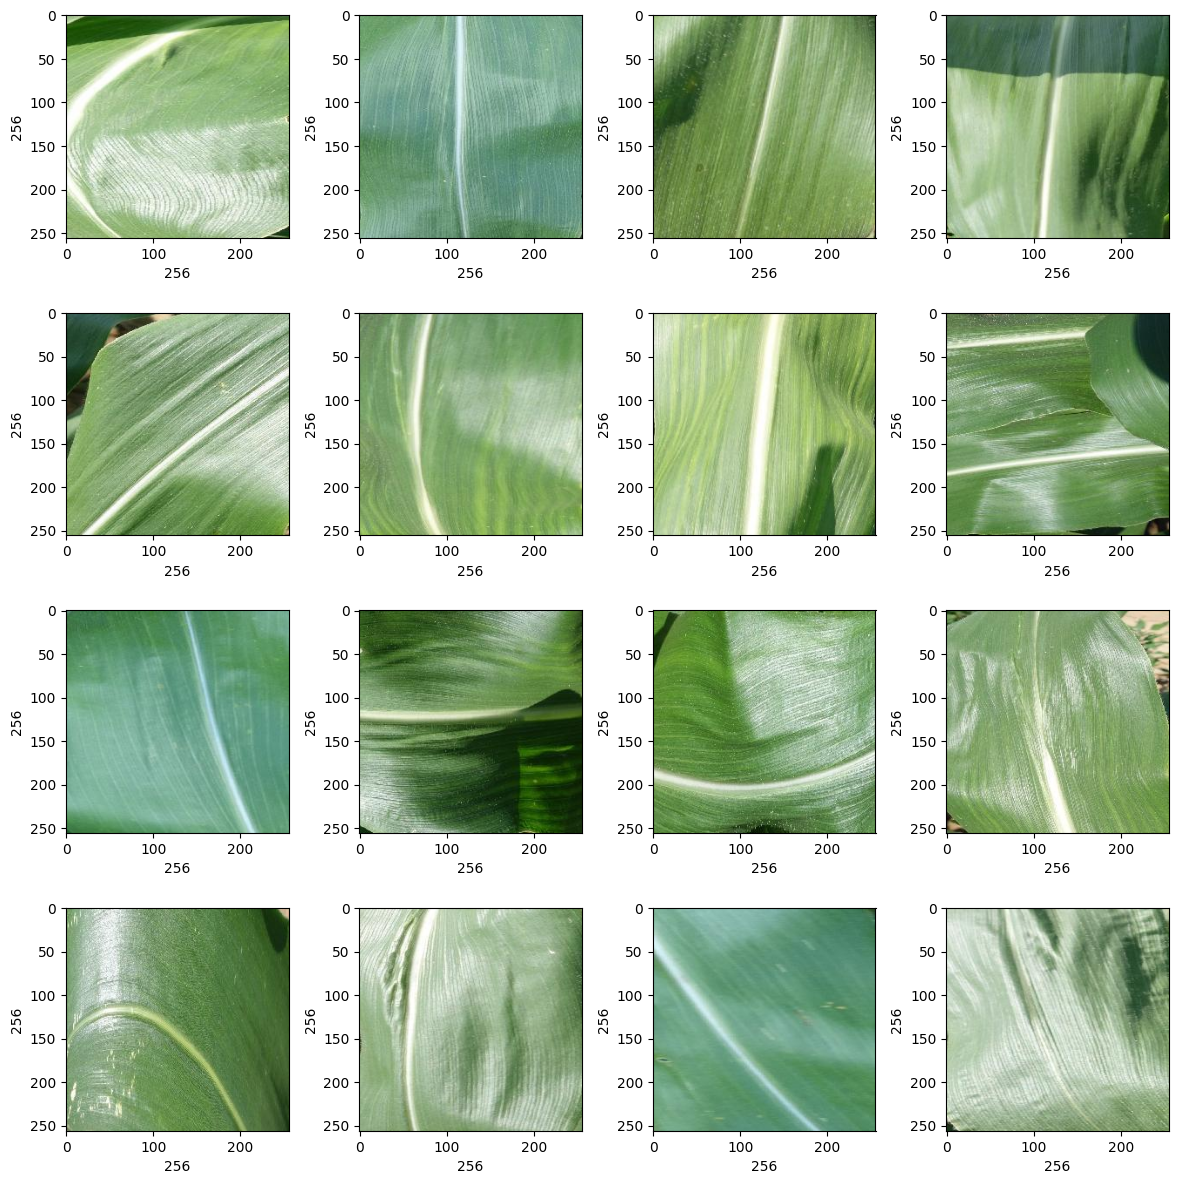

In [ ]:
plt.figure(figsize=(12,12))
path="/content/drive/MyDrive/Projects/data/plant/Healthy"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img=imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

**Converting the Images into Numpy Array and Normalize them**

In [ ]:
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256, 256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

**Assigning Label**

In [ ]:
dir= "/content/drive/MyDrive/Projects/data/plant"
image_list,label_list=[],[]
all_labels=['Corn-Blight','Corn-Common_Rust','Corn-Healthy']
binary_labels=[0,1,2]
temp=-1
for directory in ['Blight','Common_Rust','Healthy']:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

1    1303
2    1162
0    1155
dtype: int64


**Blight: 0 : 1155    
Common Rust: 1 : 1303   
Healthty: 2 : 1162**

In [ ]:
image_list[0].shape

(256, 256, 3)

**Test-Train split**      
*30% test*  
*70% train*

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.3,random_state=10)

**Normalising the Images by dividing the each image pixel with 256**

In [ ]:
x_train=np.array(x_train,dtype=np.float16)/255.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train=x_train.reshape(-1, 256,256,3)
x_test=x_test.reshape(-1, 256,256,3)

**Performing One-Hot Encoding on target Variable**

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

**Model Building and Compilation**

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [ ]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile( loss = "categorical_crossentropy",
                   optimizer = sgd,
                   metrics=['accuracy']
                 )

*Again spliting the training data-set into training and validation data-set*

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=10)

In [ ]:
epochs=50
batch_size=128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
14/14 [==============================] - 40s 3s/step - loss: 1.1000 - accuracy: 0.5161 - val_loss: 1.0150 - val_accuracy: 0.6399
Epoch 2/50
14/14 [==============================] - 39s 3s/step - loss: 0.9129 - accuracy: 0.6729 - val_loss: 0.7961 - val_accuracy: 0.7806
Epoch 3/50
14/14 [==============================] - 39s 3s/step - loss: 0.7367 - accuracy: 0.7146 - val_loss: 0.6990 - val_accuracy: 0.8252
Epoch 4/50
14/14 [==============================] - 39s 3s/step - loss: 0.6645 - accuracy: 0.7524 - val_loss: 0.6421 - val_accuracy: 0.7819
Epoch 5/50
14/14 [==============================] - 39s 3s/step - loss: 0.6364 - accuracy: 0.7304 - val_loss: 0.6183 - val_accuracy: 0.8081
Epoch 6/50
14/14 [==============================] - 39s 3s/step - loss: 0.6116 - accuracy: 0.7524 - val_loss: 0.5896 - val_accuracy: 0.7898
Epoch 7/50
14/14 [==============================] - 39s 3s/step - loss: 0.5600 - accuracy: 0.7913 - val_loss: 0.5351 - val_accuracy: 0.8594
Epoch 8/50
14/14 [==

**Plotting accuracy graph between train and validation(test) data**

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])

plt.show()

In [ ]:
print("Calculating model accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100} %")

Calculating model accuracy
34/34 [==============================] - 8s 242ms/step - loss: 0.1480 - accuracy: 0.9576
Test Accuracy: 95.76427340507507 %


**loading labels prediction onto test datset**

In [ ]:
y_pred=model.predict(x_test)

34/34 [==============================] - 12s 349ms/step


In [ ]:
img=array_to_img(x_test[11])
img

**Checking one of the images from test data for model accuracy**

In [ ]:
print("Original Label: ",all_labels[np.argmax(y_test[4])])
print("Predicted Label: ",all_labels[np.argmax(y_pred[4])])
print(y_pred[4])

Original Label:  Corn-Common_Rust
Predicted Label:  Corn-Blight
[0.9086356  0.3080251  0.22436085]


In [ ]:
for i in range(50):
  print(all_labels[np.argmax(y_test[i])]," ",all_labels[np.argmax(y_pred[i])])

Corn-Blight   Corn-Blight
Corn-Common_Rust   Corn-Common_Rust
Corn-Healthy   Corn-Healthy
Corn-Common_Rust   Corn-Common_Rust
Corn-Common_Rust   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Healthy   Corn-Healthy
Corn-Common_Rust   Corn-Common_Rust
Corn-Common_Rust   Corn-Blight
Corn-Common_Rust   Corn-Common_Rust
Corn-Blight   Corn-Blight
Corn-Healthy   Corn-Healthy
Corn-Blight   Corn-Blight
Corn-Healthy   Corn-Healthy
Corn-Healthy   Corn-Healthy
Corn-Healthy   Corn-Healthy
Corn-Blight   Corn-Blight
Corn-Healthy   Corn-Healthy
Corn-Blight   Corn-Blight
Corn-Healthy   Corn-Healthy
Corn-Common_Rust   Corn-Common_Rust
Corn-Common_Rust   Corn-Healthy
Corn-Healthy   Corn-Healthy
Corn-Common_Rust   Corn-Common_Rust
Corn-Common_Rust   Corn-Common_Rust
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Blight   Corn-Blight
Corn-Healthy

**Deploying the model to cloud**

In [ ]:
from google.colab.patches import cv2_imshow

Path of the image to be predicted: /content/drive/MyDrive/Projects/data/plant/Blight/Copy of Corn_Blight (393).JPG


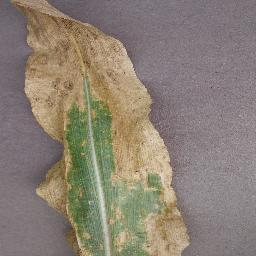

1/1 [==============================] - 0s 25ms/step
[[0.92373216 0.252657   0.18516329]]
0
The image represets blight


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [-1,256,256,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represets blight')
elif input_pred_label == 1:
  print('The image represets common rust')
else:
  print('The image represents healthy')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [-1,256,256,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represets blight')
elif input_pred_label == 1:
  print('The image represets common rust')
else:
  print('The image represents a healthy')

Path of the image to be predicted: /content/drive/MyDrive/Projects/data/plant/Common_Rust/Copy of Corn_Common_Rust (109).JPG


1/1 [==============================] - 0s 24ms/step
[[0.31590205 0.9709253  0.07930123]]
1
The image represets common rust


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (256,256))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [-1,256,256,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represets blight')
elif input_pred_label == 1:
  print('The image represets common rust')
else:
  print('The image represents healthy')

Path of the image to be predicted: /content/drive/MyDrive/Projects/data/plant/Healthy/Copy of Corn_Health (102).jpg


1/1 [==============================] - 0s 33ms/step
[[0.25495768 0.22139652 0.95467275]]
2
The image represents healthy


# <img src="/content/drive/MyDrive/Projects/data/converted_image.jpg" alt="output" />

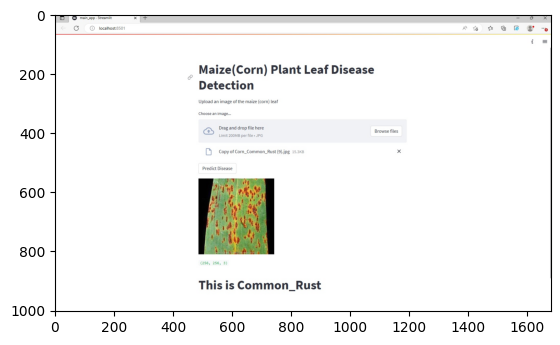

In [ ]:
from google.colab.patches import cv2_imshow
rand_img=imread("/content/drive/MyDrive/Projects/data/converted_image.jpg")
plt.imshow(rand_img)


In [ ]:
rand_img=imread("/content/drive/MyDrive/Projects/data/fianl1.PNG")
rand_img_resize = cv2.resize(rand_img, (256,256))
plt.imshow(rand_img_resize)


**Saving the Model for Deployment**

In [ ]:
model.save("/content/drive/MyDrive/Projects/data/Model1/plant_disease_model.h5")

#**END**